In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#reading data
data = pd.read_csv('insuranceFraud.csv')
#looking at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
#replacing '?' with NaN
data = data.replace('?',np.nan)

In [4]:
#dropping not important columns
data.drop(columns=['policy_number','policy_bind_date','policy_state',
                   'insured_zip','incident_location','incident_date',
                   'incident_state','incident_city','insured_hobbies',
                   'auto_make','auto_model','auto_year'],inplace=True)
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [5]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [6]:
#get information about data and
#No. of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [7]:
#columns with missiing values are categorical 
#Categorical imputer for missing values
#import sklearn
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer()
data['collision_type']=imputer.fit_transform(data['collision_type'].to_frame())
data['property_damage']=imputer.fit_transform(data['property_damage'].to_frame())
data['police_report_available']=imputer.fit_transform(data['police_report_available'].to_frame())

In [8]:
data.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

# Categorical data

In [9]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_col = cat_data.columns.values
print(cat_col)
cat_data.head()

['policy_csl' 'insured_sex' 'insured_education_level' 'insured_occupation'
 'insured_relationship' 'incident_type' 'collision_type'
 'incident_severity' 'authorities_contacted' 'property_damage'
 'police_report_available' 'fraud_reported']


,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Missing,Minor Damage,Police,Missing,Missing,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,Missing,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Missing,Minor Damage,None,NO,NO,N


In [10]:
#unique values in columns
for name in cat_col:
    print(f'{name} : {cat_data[name].unique()}\n')

policy_csl : ['250/500' '100/300' '500/1000']

insured_sex : ['MALE' 'FEMALE']

insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type : ['Side Collision' 'Missing' 'Rear Collision' 'Front Collision']

incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted : ['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage : ['YES' 'Missing' 'NO']

police_report_available : ['YES' 'Missing' 'NO']

fraud_reported : ['Y' 'N']



In [11]:
#custom encoding
cat_data['policy_csl'] = cat_data['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_data['insured_education_level'] = cat_data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_data['incident_severity'] = cat_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_data['insured_sex'] = cat_data['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_data['property_damage'] = cat_data['property_damage'].map({'NO' : 0, 'YES' : 1,'Missing' : 0})
cat_data['police_report_available'] = cat_data['police_report_available'].map({'NO' : 0, 'YES' : 1,'Missing' : 0})
cat_data['fraud_reported'] = cat_data['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [12]:
# auto encoding 
for col in cat_data.drop(columns=['policy_csl','insured_education_level',
                                  'incident_severity','insured_sex','property_damage',
                                  'police_report_available','fraud_reported']).columns:
    cat_data= pd.get_dummies(cat_data, columns=[col], prefix = [col], drop_first=True)

In [13]:
cat_data.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Missing,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


# Numerical data

In [14]:
num_data = data.select_dtypes(include=['int64']).copy()
print(num_data.columns)
num_data.head()

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')


,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [15]:
# Numerical + categorical = final dataset
final_data=pd.concat([num_data,cat_data], axis=1)
final_data.drop('collision_type_Missing', axis=1, inplace=True)
final_data.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [16]:
#final_data.columns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

# separating the feature and target columns
x=final_data.drop('fraud_reported',axis=1)
y=final_data['fraud_reported']

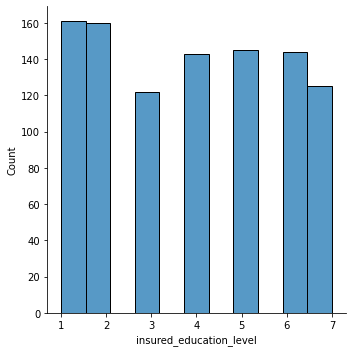

In [17]:
sns.displot(final_data['insured_education_level'])


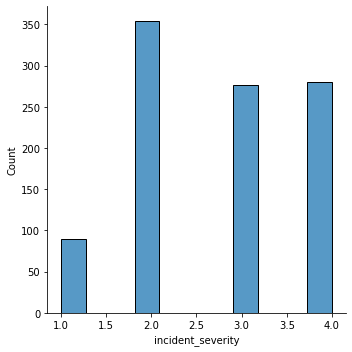

In [18]:
sns.displot(final_data['incident_severity'])


<AxesSubplot:>

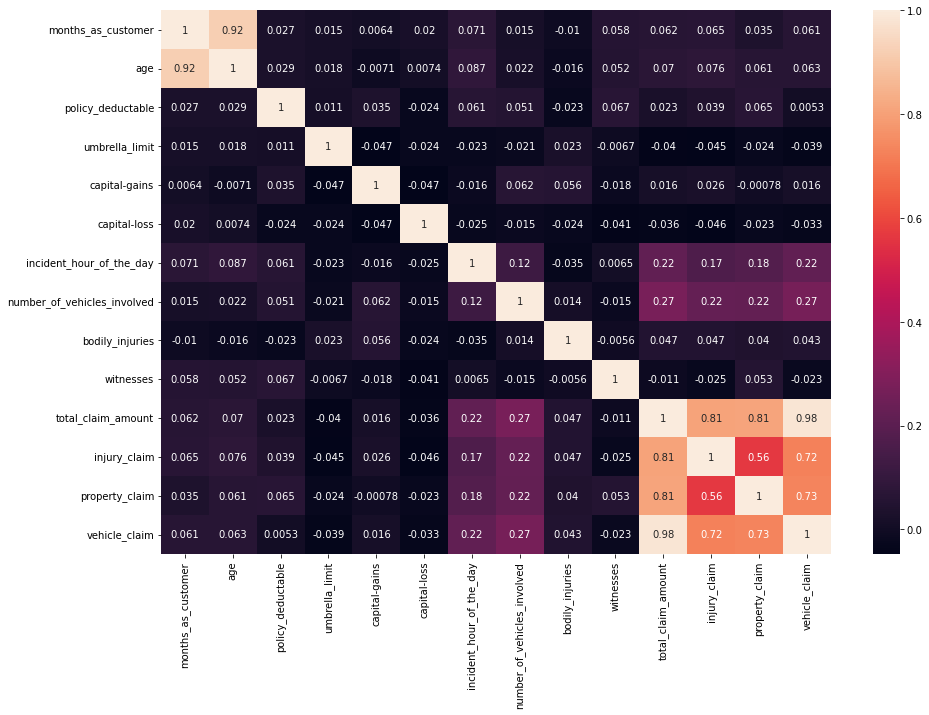

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(num_data.corr(), annot=True )

In [20]:
#high correlation between Age and the number of months
# high correlation between total claim amount, 
# injury claim,vehicle claim, and property claim as total claim is the sum of all others
# so dropping 
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [21]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,1,0,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,1,0,0,0,1,0


In [22]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [23]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [24]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
print(train_x.shape)
train_x.head()

(750, 33)


,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
244,2.5,1,5,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
595,1.0,1,1,3,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
873,2.5,0,7,3,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
631,5.0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [27]:
#train_x.isna().sum()
#train_x.shape
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,...,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,...,0,0,0,1,0,0,0,1,0,0
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,...,0,0,1,0,1,0,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,...,0,0,1,0,1,0,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,...,0,0,0,0,1,0,0,0,1,0


# Support vector classifier for model training

In [28]:
from sklearn.svm import SVC
sv_class=SVC()
y_pred = sv_class.fit(train_x, train_y).predict(test_x)

In [29]:
#accuracy
from sklearn.metrics import accuracy_score
sc=accuracy_score(test_y,y_pred)
print(f'accuracy score : {sc}')

accuracy score : 0.728


In [30]:
# for selection of best parameters
from sklearn.model_selection import GridSearchCV


param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}
grid = GridSearchCV(estimator=sv_class, param_grid=param_grid, cv=5,  verbose=3)
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 2/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 3/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 4/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 5/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 3/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 4/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 5/5] END C=0.1, kernel=rbf, random_state=100;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, kernel=rbf, random_state=200;, score=0.760 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, random_st

[CV 4/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.740 total time=   0.0s
[CV 5/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.747 total time=   0.0s
[CV 1/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 2/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.727 total time=   0.0s
[CV 3/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 4/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 5/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.747 total time=   0.0s
[CV 1/5] END C=1.0, kernel=sigmoid, random_state=200;, score=0.740 total time=   0.0s
[CV 2/5] END C=1.0, kernel=sigmoid, random_state=200;, score=0.727 total time=   0.0s
[CV 3/5] END C=1.0, kernel=sigmoid, random_state=200;, score=0.740 total time=   0.0s
[CV 4/5] END C=1.0, kernel=sigmoid, random_state=200;, score=0.740 total time=   0.0s
[CV 5/5] END C=1.0, kernel=sigmoid, random_state=200;, sco

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             verbose=3)

In [31]:
#best estimator
grid.best_estimator_

SVC(C=0.1, random_state=0)